# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [1]:
#Import all the necessary modules
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


In [2]:
df = pd.read_csv('pima-indians-diabetes.csv')

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [3]:
df.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Columns description

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1)

References:
https://data.world/data-society/pima-indians-diabetes-database

# Q3 Print the datatypes of each column and the shape of the dataset 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

Check for null

In [6]:
df.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

Check for number of 0's in a column

In [7]:
print('count\n{}\n'.format(df.count()))
print('No of 0\'s, in each columns of the given data set \n{}\n'.format(df.isin([0]).sum())) 

count
Preg     768
Plas     768
Pres     768
skin     768
test     768
mass     768
pedi     768
age      768
class    768
dtype: int64

No of 0's, in each columns of the given data set 
Preg     111
Plas       5
Pres      35
skin     227
test     374
mass      11
pedi       0
age        0
class    500
dtype: int64



For the following columns,

* Logically Column's named class, pregancy can have values as 0, for other columns fill the values -0 with it's median 

In [8]:
for col in df.columns:
    if( (col != 'Preg') & (col != 'class')):
        df[col].replace(to_replace=0, value=df[col].median(),inplace=True)

In [9]:
print('No of 0\'s, in columns after filling with median\n{}\n'.format(df.isin([0]).sum())) 

No of 0's, in columns after filling with median
Preg     111
Plas       0
Pres       0
skin       0
test       0
mass       0
pedi       0
age        0
class    500
dtype: int64



# Q5 Print the descriptive statistics of each & every column using describe() function

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
Pres,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
skin,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
test,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
mass,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

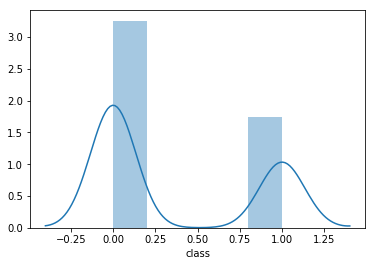

In [11]:
sns.distplot(df['class'],kde=True)

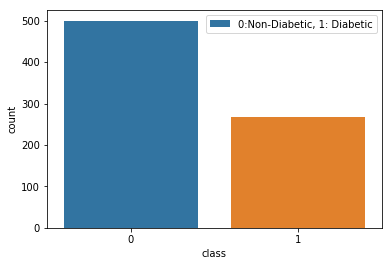

In [12]:
sns.countplot(data=df, x='class')
plt.legend(['0:Non-Diabetic, 1: Diabetic'])

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

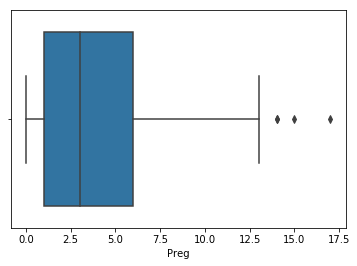

In [13]:
sns.boxplot(data=df,x='Preg')

On the average, number of pregnancies were around ~ 2.5 and also there were outliers where some of them had more than 13 pregnancies


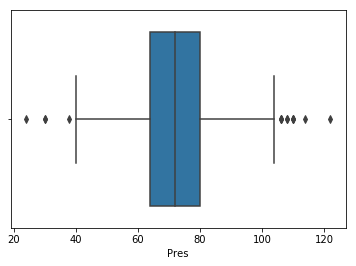

In [14]:
sns.boxplot(data=df,x='Pres')

The average pressure is ~70(mm Hg) and there were low as well as high outliers for this feature

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

In [15]:
df.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Plas,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
Pres,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
skin,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
test,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
mass,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
pedi,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
class,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


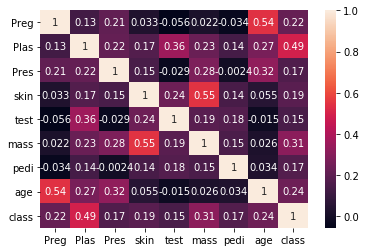

In [16]:
sns.heatmap(df.corr(),annot=True)
plt.show()

From the above correlation matrix the following can be inferred

    * The target class(whether diabetic or not) has better correlation with Plasma feature (glucose level) & BMI (mass)
    features than others

* There are some correlations among the features and some of them are

    -Skin and mass feature (skin Thickness feature is the observation of fat concetration in the upper arm and mass which is again BMI)

    -Age and Preg (there are dataset of various age and as it is observed values from female)
    
    -Test(Insulin test) and plasma (glucose)
    
Interstingly Pedi(DiabetesPedigreeFunction- score of family diabetic diabetic ) has nothing to do with class-target. It has weak correlation 
    

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [17]:
x = df.drop(labels='class',axis=1)

In [18]:
x.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33


In [19]:
y= df['class']

In [20]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: class, dtype: int64

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=9)

In [22]:
print('Feature size: X{} Target size: y{}'.format(x.shape, y.shape))
print('Train size: X_train{} y_train{}'.format(x_train.shape, y_train.shape))
print('Test size: X_test{} y_test{}'.format(x_test.shape, y_test.shape))

Feature size: X(768, 8) Target size: y(768,)
Train size: X_train(537, 8) y_train(537,)
Test size: X_test(231, 8) y_test(231,)


# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [23]:
dt = DecisionTreeClassifier(criterion='entropy')

In [24]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [25]:
print('Model accuracy for train set is:',dt.score(x_train,y_train))

Model accuracy for train set is: 1.0


In [26]:
print('Model accuracy for test set is\n',dt.score(x_test,y_test))

Model accuracy for test set is
 0.7316017316017316


Confusion matrix:

In [27]:
y_test_predicted = dt.predict(x_test)
confusion_matrix(y_test,y_test_predicted)

array([[126,  24],
       [ 38,  43]], dtype=int64)

In [28]:
y_test.value_counts()

0    150
1     81
Name: class, dtype: int64

### Inference:

    In the given test data, the model has predicted as following
        Of 150 non-diabetic individuals, 125 individuals doesn't and  25 as they have
        Of 81 diabetic individuals, 37 as not (whereas they are) and 44 of them as correclty

Print the feature importance of the decision model - Optional

In [29]:
dt.feature_importances_

array([0.0610763 , 0.30255264, 0.07709211, 0.09877547, 0.04489512,
       0.15022419, 0.09076462, 0.17461954])

In [30]:
from IPython.display import Image  
from sklearn import tree
from os import system
import graphviz

train_char_label = ['No', 'Yes']

dot_data = tree.export_graphviz(dt, feature_names = list(x_train), class_names = list(train_char_label),filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph.render()

'Source.gv.pdf'

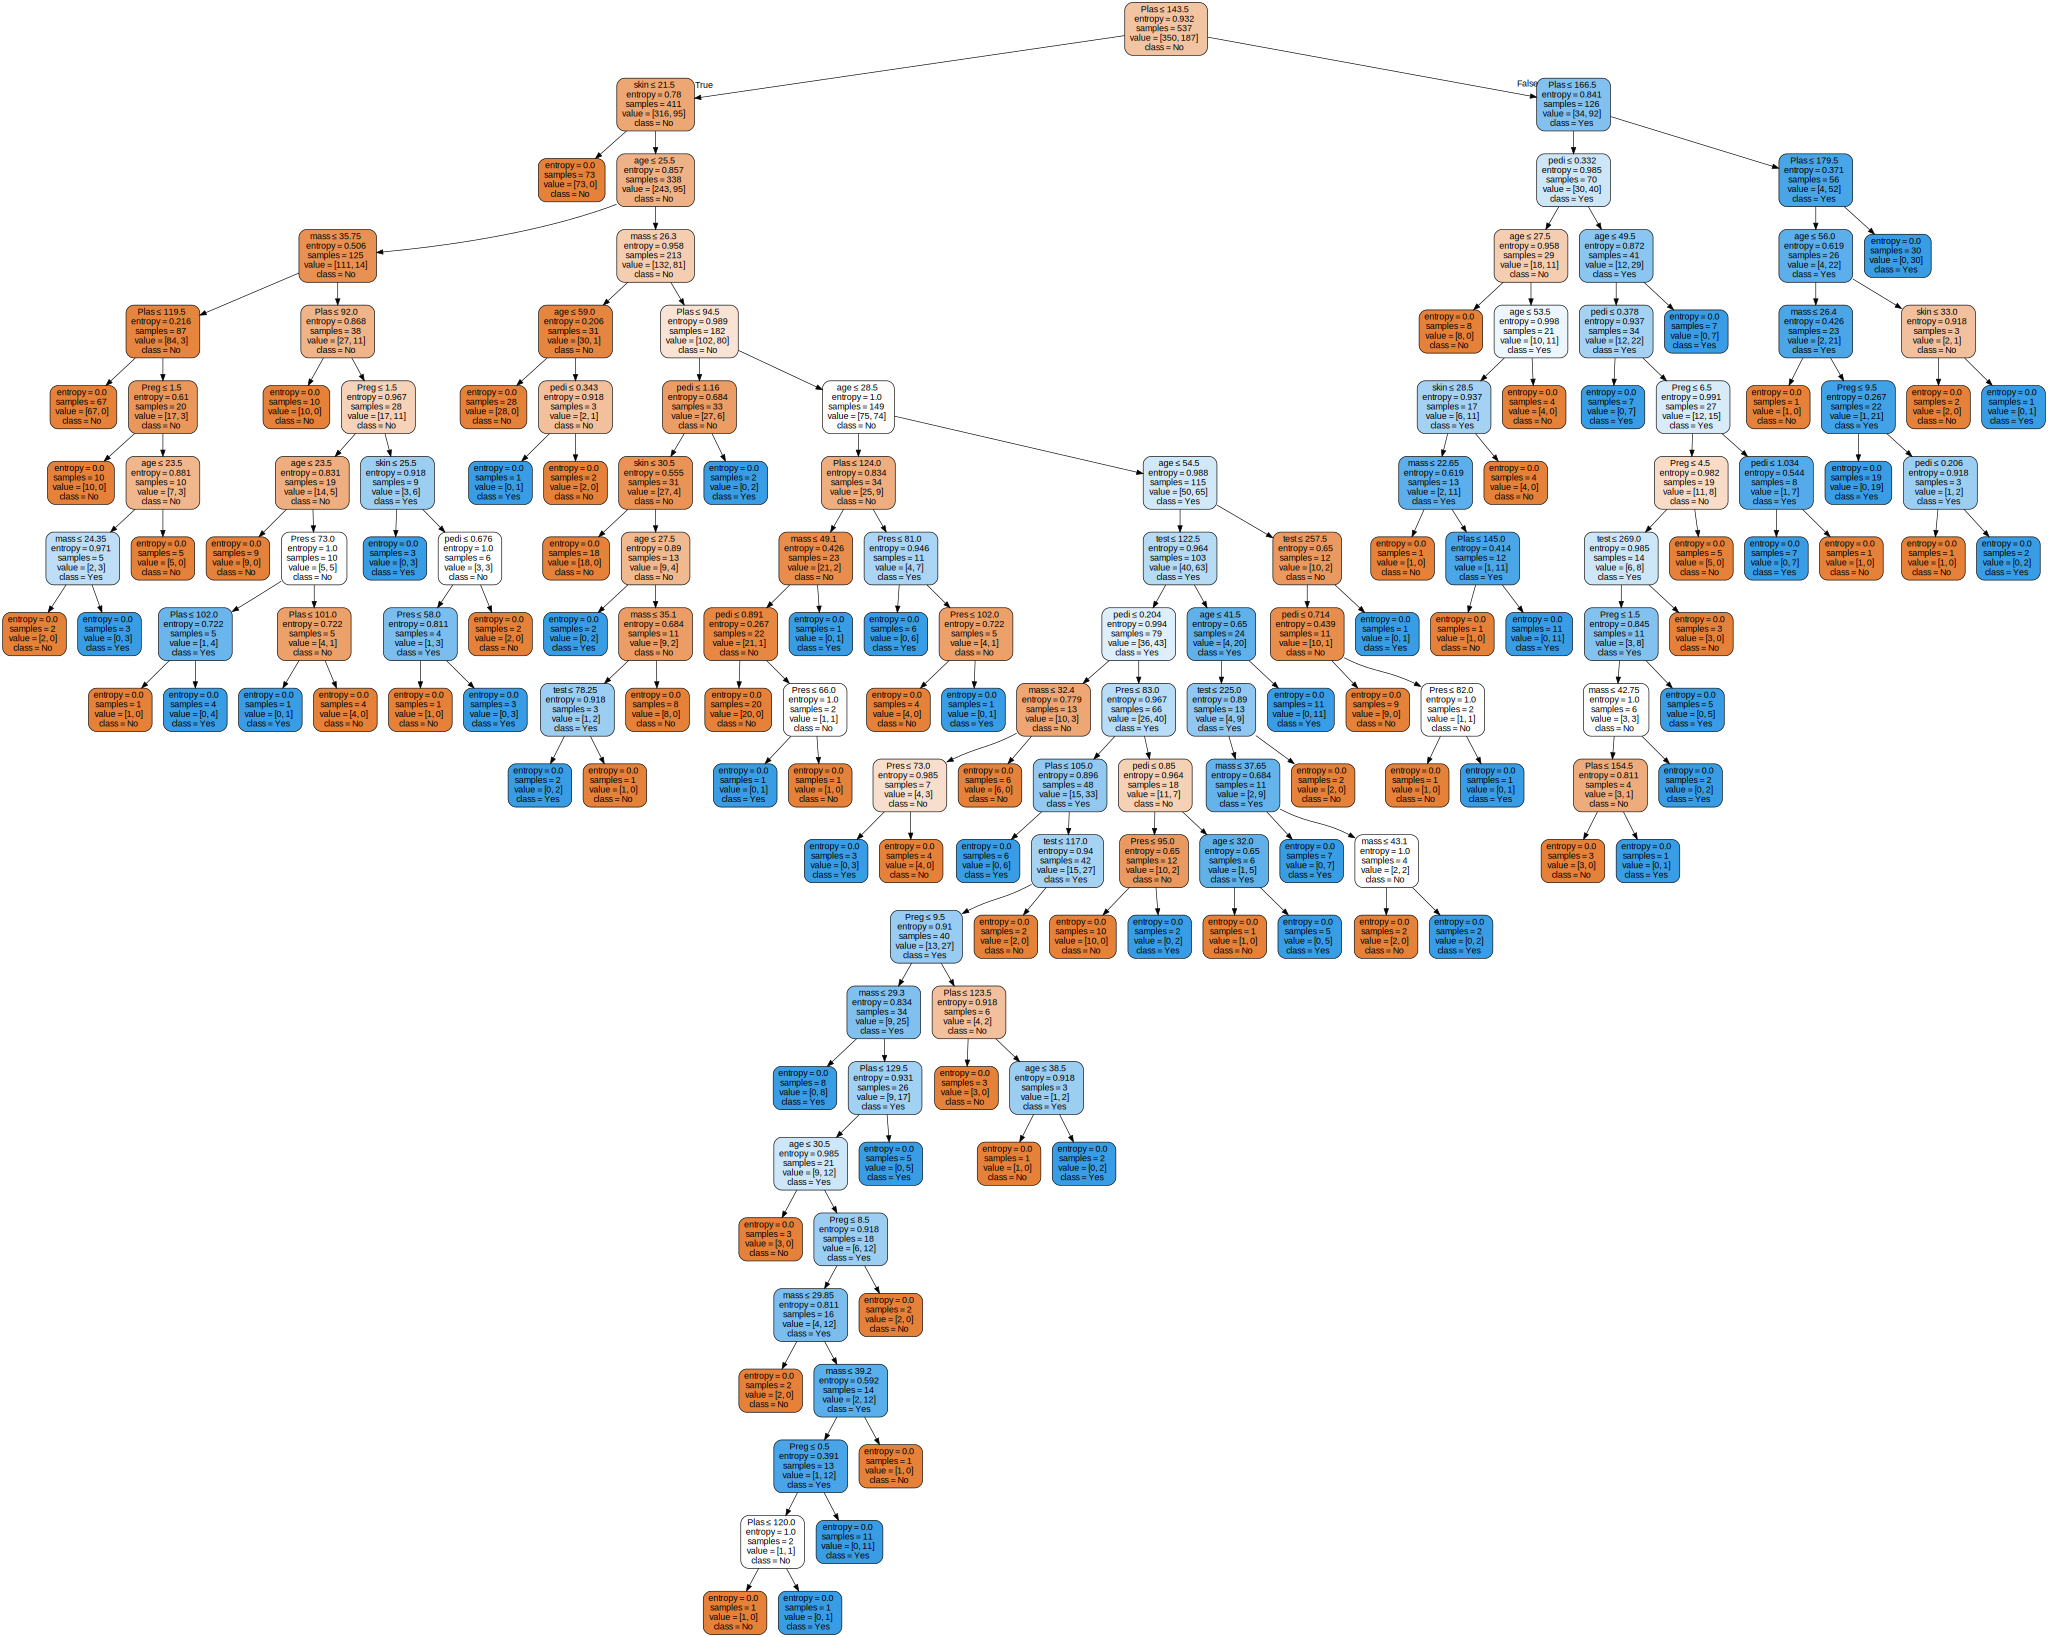

In [31]:
graph